### Задача
Провести дисперсионный анализ для определения того, есть ли различия среднего роста среди взрослых футболистов, хоккеистов и штангистов. Даны значения роста в трех группах случайно выбранных спортсменов:

Футболисты: 173, 175, 180, 178, 177, 185, 183, 182.

Хоккеисты: 177, 179, 180, 188, 177, 172, 171, 184, 180.

Штангисты: 172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170.
### Решение

Мы будем проверять качественный параметр: группа спортсменов и количественный: рост

## Проведем разведочный анализ:
* Проверка на нормальность - Тест Шапиро-Уилка
* Проверка на равенство дисперсий - Критерий Бартлетта

In [1]:
import numpy as np
import scipy.stats as stats
import pandas as pd

In [2]:
names = ["футболисты", "хоккеисты", "штангисты"]
heights = []
heights.append(np.array([173, 175, 180, 178, 177, 185, 183, 182]))
heights.append(np.array([177, 179, 180, 188, 177, 172, 171, 184, 180]))
heights.append(np.array([172, 173, 169, 177, 166, 180, 178, 177, 172, 166, 170]))
check_0 = True
for i in range(3):
    print(names[i].title(), heights[i], sep=": ")

Футболисты: [173 175 180 178 177 185 183 182]
Хоккеисты: [177 179 180 188 177 172 171 184 180]
Штангисты: [172 173 169 177 166 180 178 177 172 166 170]


In [3]:
for j in range(3):
    st_0, p_0 = stats.shapiro(heights[j])
    print(names[j].title(), "- тест Шапиро-Уилка для роста:\n", stats.shapiro(heights[j]))
    if p_0 > 0.05:
        print(f"Выборка по росту спортсменов из категории '{names[j]}' имеет нормальное распределение.")
    else:
        print(f"Гипотеза о нормальном распределении выборки роста спортсменов из категории '{names[j]}' не подтвердилась.")
        check_0 = False
    print()

Футболисты - тест Шапиро-Уилка для роста:
 ShapiroResult(statistic=0.9775082468986511, pvalue=0.9495404362678528)
Выборка по росту спортсменов из категории 'футболисты' имеет нормальное распределение.

Хоккеисты - тест Шапиро-Уилка для роста:
 ShapiroResult(statistic=0.9579196572303772, pvalue=0.7763139009475708)
Выборка по росту спортсменов из категории 'хоккеисты' имеет нормальное распределение.

Штангисты - тест Шапиро-Уилка для роста:
 ShapiroResult(statistic=0.9386808276176453, pvalue=0.5051165223121643)
Выборка по росту спортсменов из категории 'штангисты' имеет нормальное распределение.



In [4]:
st_1, p_1 = stats.bartlett(*heights)
print("Критерий Бартлетта для трех выборок роста спортсменов:\n", stats.bartlett(*heights))
if p_1 > 0.05:
    print(f"Выборки по росту спортсменов показывают однородность дисперсии.")
else:
    print(f"Гипотеза об однородности выборок не подтвердилась.")
    check_0 = False

Критерий Бартлетта для трех выборок роста спортсменов:
 BartlettResult(statistic=0.4640521043406442, pvalue=0.7929254656083131)
Выборки по росту спортсменов показывают однородность дисперсии.


In [5]:
print("Вывод по разведочному анализу:")
print("Выборки имеют нормальные распределения и однородность дисперсии.\n\
Таким образом, можно использовать ANOVA для анализа различий между группами.") if check_0 else \
    print("Рекомендуется использовать критерий Краскела-Уоллиса.")

Вывод по разведочному анализу:
Выборки имеют нормальные распределения и однородность дисперсии.
Таким образом, можно использовать ANOVA для анализа различий между группами.


## Однофакторный дисперсионный анализ(ANOVA).

Сформулируем гипотезы:
$$H_0: μ = μ_1 = μ_2 = μ_3$$
<p style="text-align:center">(заметных различий между средними значениями в группах нет)</p>

$$H_1: μ \neq μ_1 \neq μ_2 \neq μ_3$$ 
<p style="text-align:center">(по крайней мере одно среднее значение популяции отличается от остальных)</p>

In [6]:
st_2, p_2 = stats.f_oneway(*heights)
print("Результаты однофакторного ANOVA для трех выборок роста спортсменов:\n", stats.f_oneway(*heights))

Результаты однофакторного ANOVA для трех выборок роста спортсменов:
 F_onewayResult(statistic=5.500053450812596, pvalue=0.010482206918698694)


### Результат:
на уровне статистической значимости α = 0.05 при значении pvalue=0.01 (<0.05) попадаем в область принятия альтернативной гипотезы, т.е. средний рост футболистов, хоккеистов и штангистов отличается.

#### Проверим с помощью графика:

In [7]:
from matplotlib import pyplot as plt
import math

[5]


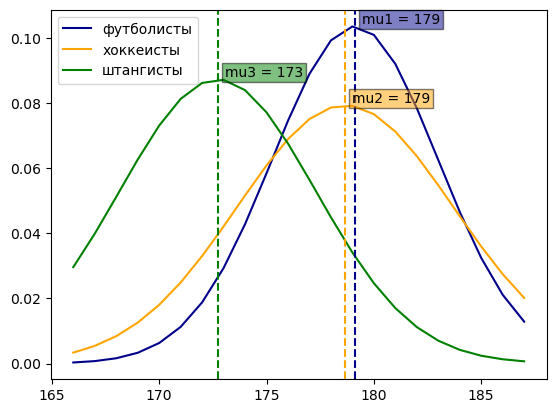

In [8]:
x_1 = np.arange(min(list(map(lambda m: min(m), heights))), max(list(map(lambda m: max(m), heights))))
colors = ["darkblue", "orange", "green"]
list_plt = [5]
print(list_plt)

for i_1 in range(3):
    mu = np.mean(heights[i_1])
    var = np.var(heights[i_1])
    sd = math.sqrt(var)
    plt.plot(x_1, stats.norm.pdf(x_1, mu, sd), color=colors[i_1])

plt.legend(labels=names)

for i_2 in range(3):
    mu = np.mean(heights[i_2])
    var = np.var(heights[i_2])
    sd = math.sqrt(var)
    plt.axvline(x = mu, color=colors[i_2], linestyle="--")
    plt.annotate(f'mu{i_2+1} = {round(mu)}', xy=(mu, stats.norm(mu, sd).pdf(mu)), xytext=(5, 2), textcoords='offset points', bbox={'facecolor': colors[i_2], 'alpha': 0.5, 'pad': 2})